<a href="https://colab.research.google.com/github/alexisakov/FederalRevenues/blob/master/HyperbolaParabola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 	(Very) Technical Brief Geometry of the Fiscal Rule: Hyperbola or Parabola?



In this online appendix we will recreate a key chart from the technical brief: the ratio of MinFin's FX purchases to oil export revenues.

All calculations are done for illustrative purposes - the schematically replicate Russia's oil taxation system for an economy that produces 1 ton of oil and export 0.5 tons. 

## Preliminaries

Import libs.

In [67]:
#This uses the same mechanisms. 
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
import pandas as pd

## Schematic oil taxation

Set various constants and parameters:

In [68]:
baseoilprice = 40; # baseline oil price
oilpj = 60.3; # oil price behind budget parameters // expected oil price  
estUSDRUB = 73; # expected USDRUB
ton2barrel = 7.33 # ton to barrel conversion factor
METBaseRate = 919; 
METKk = 428;
METKkorr = 0.5;

### MET

Mineral extraction tax:

In [69]:
Кц = lambda oilprice, USDRUB :(oilprice - 15) * USDRUB/261

In [70]:
METPart1 = lambda oilprice, USDRUB: METBaseRate* Кц(oilprice, USDRUB)

In [71]:
def ЭП(oilprice):
  if oilprice < 109.5/ton2barrel:
    return 0,
  elif oilprice < 146/ton2barrel:
    return 0.35*(oilprice*ton2barrel - 109.5)
  elif oilprice < 182.5/ton2barrel:
    return 12.78 + 0.45*(oilprice*ton2barrel - 146)
  else:
    return 29.2 + 0.3*(oilprice*ton2barrel - 182.3)

In [72]:
Кман = lambda oilprice, USDRUB : ЭП(oilprice)*USDRUB*METKkorr

In [73]:
Дм = lambda oilprice, USDRUB : METKk - Кман(oilprice, USDRUB)

In [74]:
MET = lambda extractionVolume, oilprice, USDRUB: extractionVolume*(METPart1(oilprice, USDRUB) - Дм(oilprice, USDRUB))

In [75]:
MET(1,70,73)

18397.167279693487

### Export duty

Export duty:

In [76]:
EDKkorr = 0.5;
EDuty = 0.3;

In [77]:
edRate = lambda oilprice, USDRUB : (29.2 + EDuty*(oilprice*ton2barrel - 182.5))*USDRUB*EDKkorr

In [78]:
ED = lambda exportVolume, oilprice, USDRUB : exportVolume*edRate(oilprice, USDRUB)

### Oil taxation under Fiscal rule: Base and Excess Revenues

Total oil budget revenue is a total of MET and ED:

In [79]:
oilgasrevenue = lambda extractionVolume, exportVolume, oilprice, USDRUB : MET(extractionVolume, oilprice, USDRUB) + ED(exportVolume, oilprice, USDRUB)

Now we can define excess revenu (=FX purchases) as follows:

In [80]:
excessrevenue = lambda extractionVolume, exportVolume, oilprice, USDRUB: oilgasrevenue(extractionVolume, exportVolume, oilprice, USDRUB) - oilgasrevenue(
    extractionVolume, exportVolume, baseoilprice, USDRUB)

Additionally let us define oil export revenue

In [81]:
exportrevenue = lambda exportVolume, oilprice, USDRUB: exportVolume*oilprice*USDRUB*ton2barrel

## Chart - Relative export revenue neutralization

We attempt to calculate the ration of

*   export revenue in USD
*   to excess oil budget revenue = MinFin's FX purchases

for an economy that 

*   produces 1 ton of oil, 
*   export 0.5 ton of oil 
*   and has a RUB/oil sensitivity of 0.1.

In [163]:
x = list(range(20,200,1))

In [164]:
druboil = 0.1

In [165]:
excessrevenue2 = lambda extractionVolume, exportVolume, oilprice, USDRUB: oilgasrevenue(extractionVolume, exportVolume, oilprice, USDRUB) - oilgasrevenue(
    extractionVolume, exportVolume, baseoilprice, estUSDRUB)

In [169]:
y = [excessrevenue(1.0, 0.75, oil, 73*(1 - druboil*(oil/oilpj - 1)))/exportrevenue(0.75, oil, 73*(1 - druboil*(oil/oilpj - 1))) for oil in x]

In [157]:
y = [excessrevenue(1.0, 0.75, oil, 73)/exportrevenue(0.75, oil, 73) for oil in x]

In [170]:
df = pd.DataFrame(list(zip(x, y)),columns=['oil price','FX purchases, % export revenue'])

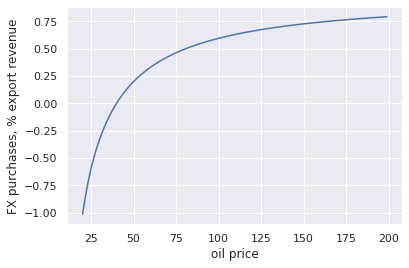

In [171]:
sns.lineplot(x = 'oil price', y = 'FX purchases, % export revenue', data=df)

So everything checks out - MinFin's FX purchases approach 100% of oil export revenue as oil price approaches USD150/bbl.

In [172]:
x2er = [exportrevenue(0.75, oil-40, 73*(1 - druboil*(oil/oilpj - 1)))/excessrevenue(1.0, 0.75, oil, 73*(1 - druboil*(oil/oilpj - 1))) if excessrevenue(1.0, 0.75, oil, 73*(1 - druboil*(oil/oilpj - 1))) else 0. for oil in x]

In [193]:
x2er = [exportrevenue(0.75, oil-40, 73)/excessrevenue(1.0, 0.75, oil, 73) if excessrevenue(1.0, 0.75, oil, 73) else 0. for oil in x]

In [194]:
df = pd.DataFrame(list(zip(x, x2er)),columns=['oil price','FX purchases, % export excess revenue'])

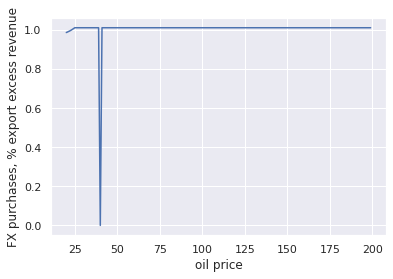

In [195]:
sns.lineplot(x = 'oil price', y = 'FX purchases, % export excess revenue', data=df)

In [204]:
400*60*ton2barrel

175920.0

In [217]:
exportrevenue(350,10,73)/73.

25655.0

In [211]:
excessrevenue(500,400,60,73)/73

55001.72796934866

In [215]:
(oilgasrevenue(500,400,70,73)-oilgasrevenue(500,400,60,73))/73

27500.863984674343

In [115]:
25851.613984674317/36650.0

0.7053646380538695

In [192]:
(oilgasrevenue(500,200,60,73)-oilgasrevenue(500,200,50,73))/73

25301.86398467433

In [190]:
(oilgasrevenue(500,250,60,73)-oilgasrevenue(500,250,50,73))/73

25851.613984674317

In [179]:
excessrevenue(500,400,50,73)/73

27500.863984674343

In [178]:
400*10*ton2barrel

29320.0

In [142]:
1/0.7

1.4285714285714286